In [70]:
import gymnasium as gym
import os
import matplotlib.pyplot as plt
import gym_anytrading 
from gym_anytrading.envs import Actions,StocksEnv
from stable_baselines3 import PPO,A2C
import pandas as pd
import numpy as np
from finta import TA
import requests
from sklearn.ensemble import RandomForestRegressor
import itertools

# Have not use yet
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [19]:
df = pd.read_csv('XAUUSD_historical_data.csv', parse_dates=['Date'], index_col='Date')
print(df.isna().sum())
df = df.dropna()

df = df[::-1]

df

# Second Dataframe which has Volume
dfWithVolume = pd.read_csv('xauusd_price-history-07-24-2024.csv', parse_dates=['Date'], index_col='Date')
print(dfWithVolume.isna().sum())
dfWithVolume = dfWithVolume.dropna()

dfWithVolume = dfWithVolume[::-1]

dfWithVolume

Open            0
High            0
Low             0
Close           1
Change(Pips)    0
Change(%)       0
dtype: int64
Open      1
High      1
Low       1
Close     1
Change    1
%Chg      1
Volume    1
dtype: int64


,Open,High,Low,Close,Change,%Chg,Volume
Date,,,,,,,
07/31/2023,1959.39,1972.15,1953.35,1965.59,6.34,+0.32%,5716.0
08/01/2023,1965.56,1965.86,1941.55,1944.24,-21.35,-1.09%,5801.0
08/02/2023,1944.27,1953.60,1934.26,1934.69,-9.55,-0.49%,5651.0
08/03/2023,1934.76,1938.50,1931.32,1934.28,-0.41,-0.02%,5709.0
08/04/2023,1934.19,1945.77,1931.01,1943.01,8.73,+0.45%,5841.0
...,...,...,...,...,...,...,...
07/19/2024,2445.17,2445.24,2396.09,2400.39,-44.80,-1.83%,4549.0
07/22/2024,2401.90,2411.65,2385.50,2396.49,-3.90,-0.16%,5154.0
07/23/2024,2396.54,2410.62,2389.08,2409.34,12.85,+0.54%,5371.0


### Setting custom indicators

In [20]:
dfBBANDS = TA.BBANDS(dfWithVolume)
dfBBANDS.fillna(0, inplace=True)

dfPPO = TA.PPO(dfWithVolume)
dfPPO.fillna(0, inplace=True)

dfMACD = TA.MACD(dfWithVolume)
dfMACD.fillna(0, inplace=True)

dfBBANDS
dfPPO
dfMACD

,MACD,SIGNAL
Date,,
07/31/2023,0.000000,0.000000
08/01/2023,-0.479006,-0.266115
08/02/2023,-0.906494,-0.528565
08/03/2023,-1.093511,-0.719943
08/04/2023,-0.824725,-0.751113
...,...,...
07/19/2024,26.888765,20.368099
07/22/2024,24.022956,21.099070
07/23/2024,22.528969,21.385050


In [21]:
# Relative Strength Index
dfWithVolume['RSI'] = TA.RSI(dfWithVolume, 16)

# VWAP
dfWithVolume['VWAP'] = TA.VWAP(dfWithVolume)

# Moving Averages
dfWithVolume['EMA'] = TA.EMA(dfWithVolume)
dfWithVolume['SMA'] = TA.SMA(dfWithVolume)
dfWithVolume['WMA'] = TA.WMA(dfWithVolume)
dfWithVolume['HMA'] = TA.HMA(dfWithVolume)
dfWithVolume['DEMA'] = TA.DEMA(dfWithVolume)
dfWithVolume['TEMA'] = TA.TEMA(dfWithVolume)
dfWithVolume['TRIMA'] = TA.TRIMA(dfWithVolume)
dfWithVolume['ZLEMA'] = TA.ZLEMA(dfWithVolume)

# Adding other indicators
dfWithVolume['MFI'] = TA.MFI(dfWithVolume)
dfWithVolume['UO'] = TA.UO(dfWithVolume)
dfWithVolume['STOCH'] = TA.STOCH(dfWithVolume)
dfWithVolume['WILLIAMS'] = TA.WILLIAMS(dfWithVolume)
dfWithVolume['AO'] = TA.AO(dfWithVolume)
dfWithVolume['ROC'] = TA.ROC(dfWithVolume)
dfWithVolume['CCI'] = TA.CCI(dfWithVolume)
dfWithVolume['ATR'] = TA.ATR(dfWithVolume)
dfWithVolume['TR'] = TA.TR(dfWithVolume)
dfWithVolume['OBV'] = TA.OBV(dfWithVolume)
dfWithVolume['VPT'] = TA.VPT(dfWithVolume)
dfWithVolume['ADL'] = TA.ADL(dfWithVolume)
dfWithVolume['MI'] = TA.MI(dfWithVolume)

dfWithVolume.fillna(0, inplace=True)
dfWithVolume

,Open,High,Low,Close,Change,%Chg,Volume,RSI,VWAP,EMA,...,WILLIAMS,AO,ROC,CCI,ATR,TR,OBV,VPT,ADL,MI
Date,,,,,,,,,,,,,,,,,,,,,
07/31/2023,1959.39,1972.15,1953.35,1965.59,6.34,+0.32%,5716.0,0.000000,1963.696667,1965.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.80,0.0,3770.127660,1726.961702,0.000000
08/01/2023,1965.56,1965.86,1941.55,1944.24,-21.35,-1.09%,5801.0,0.000000,1957.074820,1953.728889,...,0.000000,0.000000,0.000000,-66.666667,0.000000,24.31,-5801.0,-6404.888383,-2790.229989,0.000000
08/02/2023,1944.27,1953.60,1934.26,1934.69,-9.55,-0.49%,5651.0,0.000000,1951.734276,1945.926066,...,0.000000,0.000000,0.000000,-90.424153,0.000000,19.34,-11452.0,-12003.293761,-8189.944570,0.000000
08/03/2023,1934.76,1938.50,1931.32,1934.28,-0.41,-0.02%,5709.0,0.000000,1947.483339,1941.980921,...,0.000000,0.000000,0.000000,-87.857122,0.000000,7.18,-17161.0,-12766.614095,-9191.802508,0.000000
08/04/2023,1934.19,1945.77,1931.01,1943.01,8.73,+0.45%,5841.0,24.871945,1945.947053,1942.287049,...,0.000000,0.000000,0.000000,-44.845033,0.000000,14.76,-11320.0,-5785.906778,-5535.241533,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07/19/2024,2445.17,2445.24,2396.09,2400.39,-44.80,-1.83%,4549.0,54.236224,2101.582592,2416.177931,...,-50.487850,87.014676,1.875910,66.257121,31.511429,49.15,48423.0,147727.019468,-43940.466414,24.622649
07/22/2024,2401.90,2411.65,2385.50,2396.49,-3.90,-0.16%,5154.0,53.551171,2102.699357,2412.240345,...,-55.372008,81.085824,1.662495,35.002400,32.383571,26.15,43269.0,145594.465740,-44762.347103,24.773883
07/23/2024,2396.54,2410.62,2389.08,2409.34,12.85,+0.54%,5371.0,55.525472,2103.874303,2411.660276,...,-55.887128,70.389912,0.748082,38.136007,31.329286,21.54,48640.0,151977.826928,-40029.683221,24.862347


### Merge all DFs

In [22]:
dfWithVolume = dfWithVolume.merge(dfBBANDS, on=['Date'], how='inner')
dfWithVolume = dfWithVolume.merge(dfPPO, on=['Date'], how='inner')
dfWithVolume = dfWithVolume.merge(dfMACD, on=['Date'], how='inner')
dfWithVolume.head(20)

,Open,High,Low,Close,Change,%Chg,Volume,RSI,VWAP,EMA,...,ADL,MI,BB_UPPER,BB_MIDDLE,BB_LOWER,PPO,SIGNAL_x,HISTO,MACD,SIGNAL_y
Date,,,,,,,,,,,,,,,,,,,,,
07/31/2023,1959.39,1972.15,1953.35,1965.59,6.34,+0.32%,5716.0,0.000000,1963.696667,1965.590000,...,1726.961702,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
08/01/2023,1965.56,1965.86,1941.55,1944.24,-21.35,-1.09%,5801.0,0.000000,1957.074820,1953.728889,...,-2790.229989,0.0,0.000000,0.0000,0.000000,-0.024508,-0.013615,-0.010892,-0.479006,-0.266115
08/02/2023,1944.27,1953.60,1934.26,1934.69,-9.55,-0.49%,5651.0,0.000000,1951.734276,1945.926066,...,-8189.944570,0.0,0.000000,0.0000,0.000000,-0.046549,-0.027113,-0.019436,-0.906494,-0.528565
08/03/2023,1934.76,1938.50,1931.32,1934.28,-0.41,-0.02%,5709.0,0.000000,1947.483339,1941.980921,...,-9191.802508,0.0,0.000000,0.0000,0.000000,-0.056259,-0.036986,-0.019272,-1.093511,-0.719943
08/04/2023,1934.19,1945.77,1931.01,1943.01,8.73,+0.45%,5841.0,24.871945,1945.947053,1942.287049,...,-5535.241533,0.0,0.000000,0.0000,0.000000,-0.042434,-0.038607,-0.003827,-0.824725,-0.751113
08/07/2023,1942.98,1944.47,1932.40,1936.45,-6.56,-0.34%,5178.0,20.737760,1944.698424,1940.704884,...,-7238.361665,0.0,0.000000,0.0000,0.000000,-0.047791,-0.041096,-0.006695,-0.928156,-0.799101
08/08/2023,1936.50,1937.69,1924.12,1924.84,-11.61,-0.60%,5798.0,15.784700,1942.388355,1936.689905,...,-12421.098585,0.0,0.000000,0.0000,0.000000,-0.077587,-0.050331,-0.027256,-1.504452,-0.977607
08/09/2023,1925.13,1931.88,1914.58,1914.61,-10.23,-0.53%,5846.0,12.890908,1939.560133,1931.383689,...,-18246.823441,0.0,0.000000,0.0000,0.000000,-0.121606,-0.067460,-0.054147,-2.353224,-1.308194
08/10/2023,1914.75,1927.43,1912.51,1912.51,-2.10,-0.11%,5783.0,12.393406,1937.072551,1927.023773,...,-24029.823441,0.0,0.000000,0.0000,0.000000,-0.155783,-0.087863,-0.067920,-3.009366,-1.701173


### Feature Selection

In [27]:
# Drop unnecessary columns and define features (X) and target (y)
X = dfWithVolume.drop(['High', 'Low', 'Close', '%Chg', 'Open'], axis=1)
y = dfWithVolume['Open']

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances and their indices
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

# Define categories
categories = {
    'Trend Indicators': ['SMA', 'EMA', 'WMA', 'HMA', 'DEMA', 'TEMA', 'TRIMA', 'ZLEMA'],
    'Momentum Indicators': ['RSI', 'MFI', 'TSI', 'UO', 'STOCH', 'WILLIAMS', 'AO', 'ROC', 'CCI', 'PPO', 'MACD'],
    'Volatility Indicators': ['BBANDS', 'ATR', 'NATR', 'TR'],
    'Volume Indicators': ['OBV', 'VPT', 'VROC', 'AD', 'ADOSC'],
    'Others': ['ADL', 'FI', 'EOM', 'CFO', 'MI', 'VORTEX', 'DPO']
}

# Select the best feature from each category
best_features = {}
for category, features in categories.items():
    # Filter features for the category
    cat_features = feature_importances[feature_importances['Feature'].isin(features)]
    
    # If there are features in the category
    if not cat_features.empty:
        # Get the top feature for the category
        top_feature = cat_features.iloc[0]
        best_features[category] = top_feature

# Print the best features from each category
print("Best feature from each category:")
for category, feature in best_features.items():
    print(f"{category}: Feature '{feature['Feature']}' ({feature['Importance']})")

Best feature from each category:
Trend Indicators: Feature 'TEMA' (0.16885191015796985)
Momentum Indicators: Feature 'PPO' (0.0018508056010916347)
Volatility Indicators: Feature 'TR' (0.00011358748309774943)
Volume Indicators: Feature 'VPT' (0.013574487054283274)
Others: Feature 'MI' (0.00020754306120682084)


### Setting Environment 

In [60]:
window_size = 5# Adjust here 
start_index = window_size
end_index = len(dfWithVolume) # Change to df to use dataframe without Volume

# env = gym.make(
#     'forex-v0',
#     df=df,
#     window_size=window_size,
#     frame_bound=(start_index,end_index)
# )

# print("observation_space:", env.observation_space)

# Custom Environment
def signals(env): 
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close','TEMA','PPO','TR','VPT','MI','SIGNAL_x','BB_UPPER','BB_LOWER']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = signals

env2 = MyCustomEnv(
    df=dfWithVolume, 
    window_size=window_size, 
    frame_bound=(start_index, end_index)
    )

### **PPO** environment

In [61]:
env_maker = lambda: env2 # Change to env here to use dataframe without Volume
env = DummyVecEnv([env_maker])

model = PPO('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=15000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1830 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1315        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004745724 |
|    clip_fraction        | 0.00723     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explained_variance   | -0.000786   |
|    learning_rate        | 0.0003      |
|    loss                 | 725         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00282    |
|    value_loss           | 1.27e+03    |
-----------------------------------------
-----------------

action_stats: {<Actions.Sell: 0>: 115, <Actions.Buy: 1>: 138}
info: {'total_reward': 441.6900000000005, 'total_profit': 0.5070058912074041, 'position': <Positions.Short: 0>}


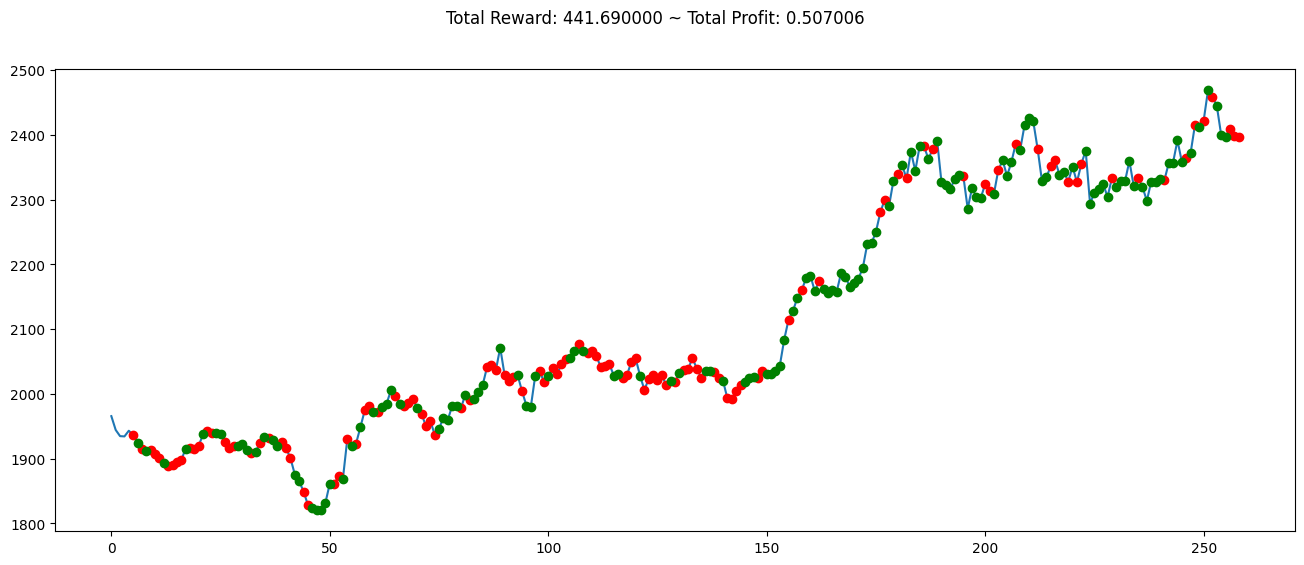

In [69]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env2.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env2.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env2.close()

print("action_stats:", action_stats)
print("info:", info)

plt.figure(figsize=(16, 6))
env2.unwrapped.render_all()
plt.show()

### Brute force for the best

In [133]:
# max_profit = 0
# end_index = len(df)
# n = 10  # Number of episodes to average profit over
# bestWindow = 0

# for i in range(100, 150):
#     avg_profit = 0
#     env = gym.make(
#         'forex-v0',
#         df=df,
#         window_size=i,
#         frame_bound=(i, end_index)
#     )
#     model = PPO('MlpPolicy', env, verbose=0)
#     model.learn(total_timesteps=10000)

#     for j in range(n):
#         action_stats = {Actions.Sell: 0, Actions.Buy: 0}
#         observation, info = env.reset()

#         while True:
#             action, _states = model.predict(observation)
#             action_stats[Actions(action)] += 1
#             observation, reward, terminated, truncated, info = env.step(action)
#             done = terminated or truncated

#             if done:
#                 break

#         avg_profit += info['total_profit'] / n

#     if avg_profit > max_profit:
#         max_profit = avg_profit
#         bestWindow = i

# print("max_profit : ", max_profit)
# print("bestWindow : ", bestWindow)



Evaluating combination: ['TEMA', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1914 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1315        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008613748 |
|    clip_fraction        | 0.0358      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.688      |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 835         |
|    n_updates            | 10          |
|    policy_gradient_loss | 0.0011      |
|    value_loss           | 1.53e+03    |
----------------

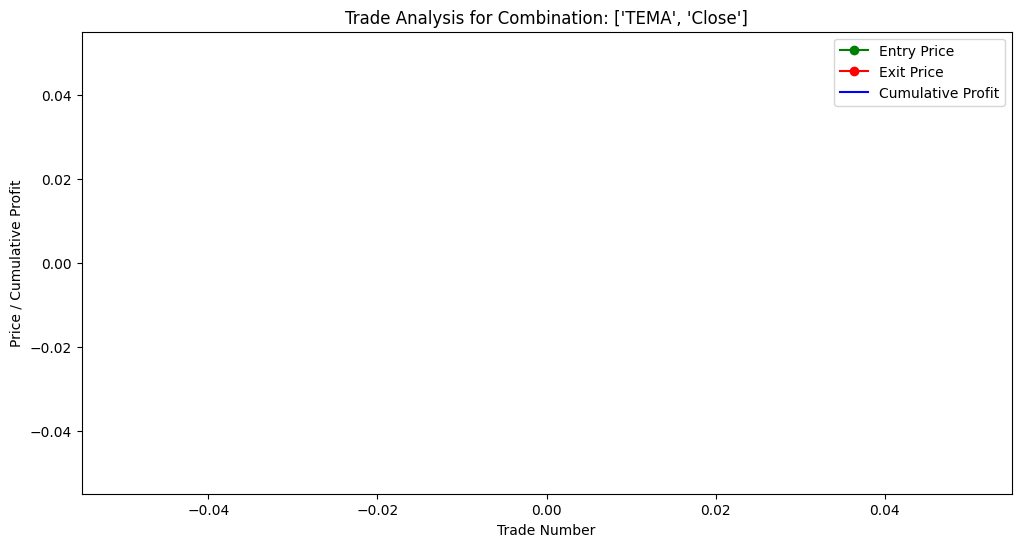


Evaluating combination: ['DEMA', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1932 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1350        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018448174 |
|    clip_fraction        | 0.0961      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.68       |
|    explained_variance   | -8.03e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 1.26e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00432    |
|    value_loss           | 1.33e+03    |
----------------

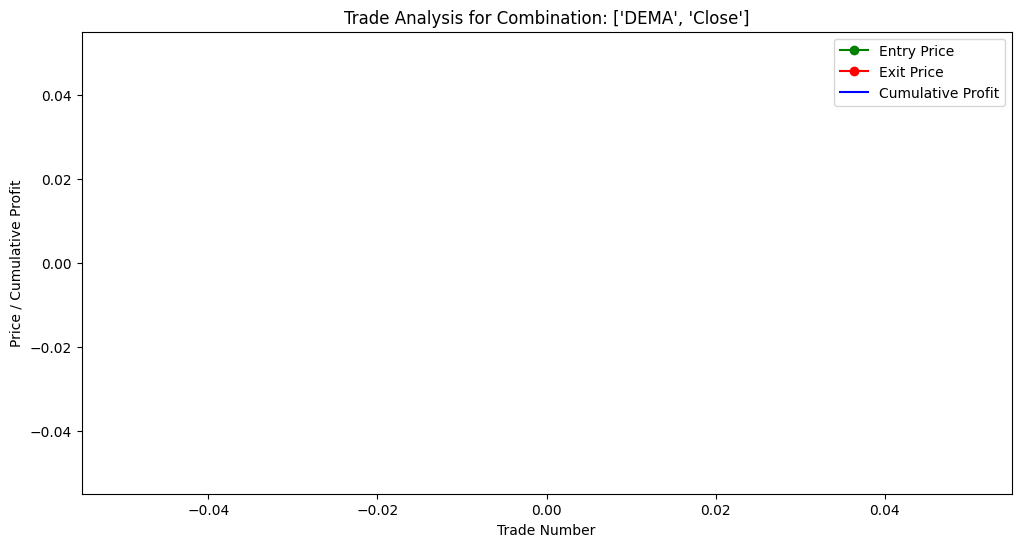


Evaluating combination: ['SMA', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1976 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1356        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010065924 |
|    clip_fraction        | 0.0423      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.688      |
|    explained_variance   | 0.00379     |
|    learning_rate        | 0.0003      |
|    loss                 | 546         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00134    |
|    value_loss           | 1.15e+03    |
-----------------

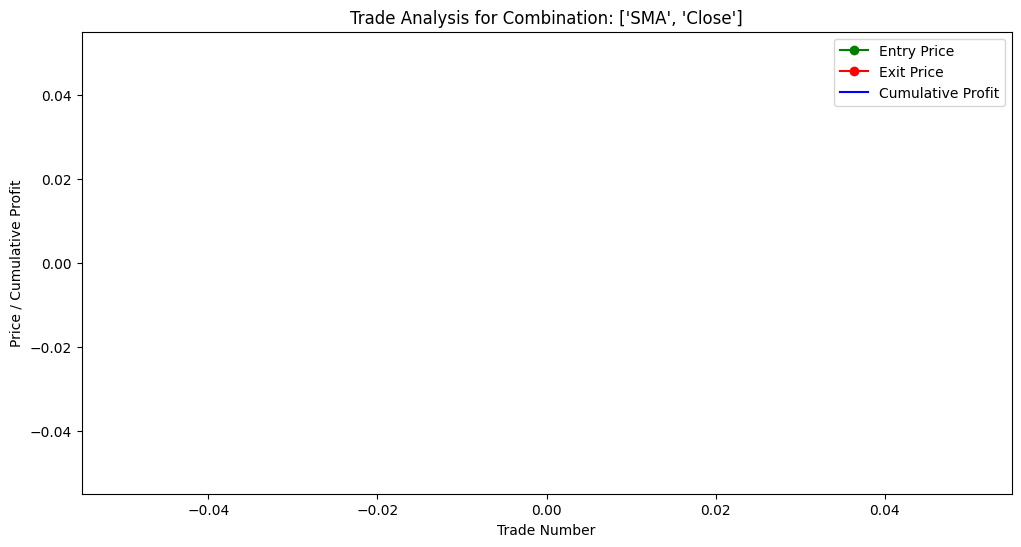


Evaluating combination: ['VWAP', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1934 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1348        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018289944 |
|    clip_fraction        | 0.0714      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.683      |
|    explained_variance   | 0.00016     |
|    learning_rate        | 0.0003      |
|    loss                 | 816         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0046     |
|    value_loss           | 1.38e+03    |
----------------

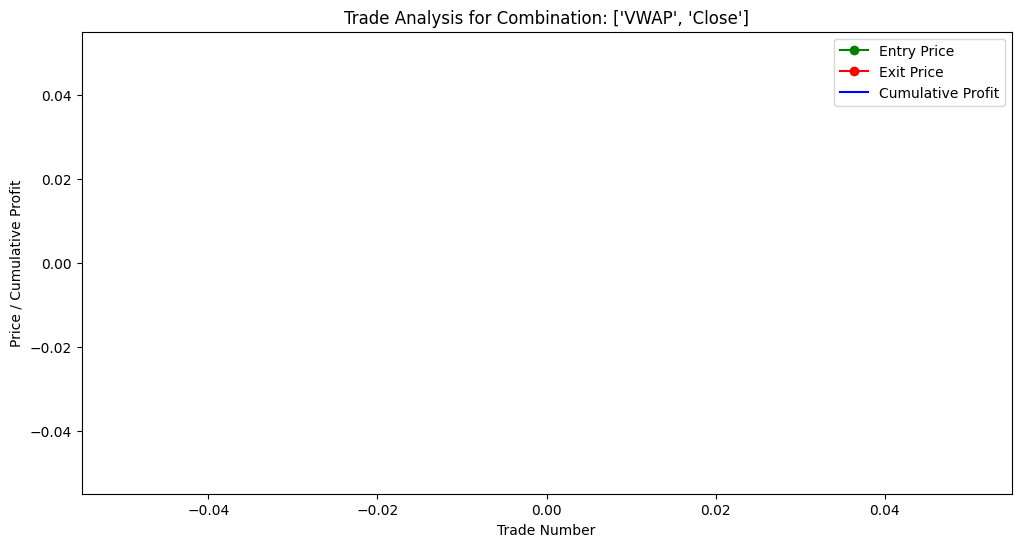


Evaluating combination: ['BB_MIDDLE', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2002 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 1392          |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00065963017 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.691        |
|    explained_variance   | -0.000656     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.15e+03      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000235     |
|    value_loss      

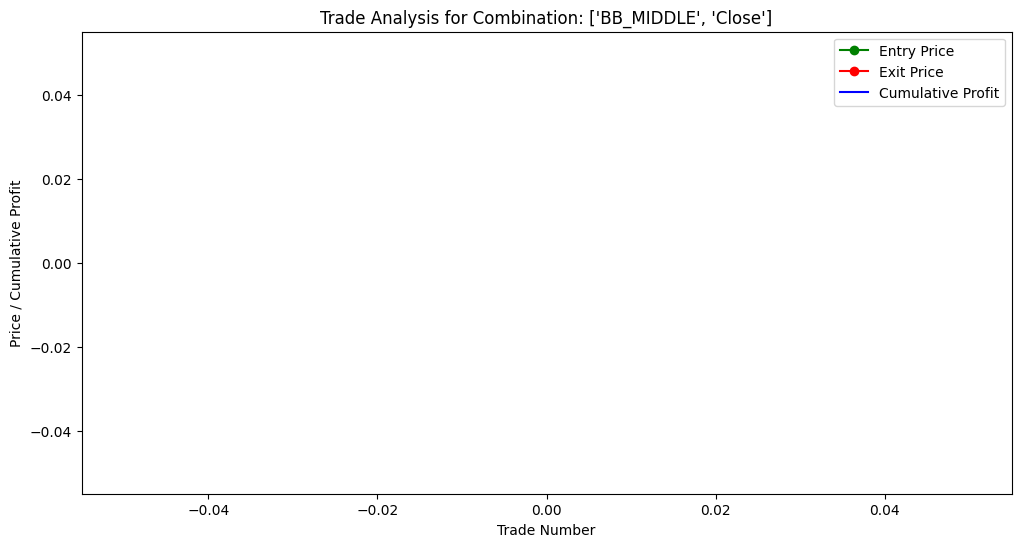


Evaluating combination: ['BB_UPPER', 'Close']
Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1943 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1294        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018959034 |
|    clip_fraction        | 0.0848      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.00102     |
|    learning_rate        | 0.0003      |
|    loss                 | 502         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00655    |
|    value_loss           | 1.58e+03    |
------------

In [74]:
# Define the features excluding 'Close'
all_features = ['TEMA', 'DEMA', 'SMA', 'VWAP', 'BB_MIDDLE', 'BB_UPPER', 'ZLEMA', 'WMA', 'HMA', 'EMA']
# Generate all possible combinations that include 'Close'
def generate_feature_combinations(features, include_close=True):
    if include_close:
        feature_combinations = [list(comb) + ['Close'] for r in range(1, len(features) + 1) for comb in itertools.combinations(features, r)]
    return feature_combinations

# Define the function to run an environment with a given set of features
def evaluate_feature_combination(features):
    def signals(env):
        start = env.frame_bound[0] - env.window_size
        end = env.frame_bound[1]
        prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
        signal_features = env.df.loc[:, features].to_numpy()[start:end]
        return prices, signal_features

    class CustomEnv(StocksEnv):
        _process_data = signals

    env2 = CustomEnv(
        df=dfWithVolume, 
        window_size=window_size, 
        frame_bound=(start_index, end_index)
    )

    env_maker = lambda: env2
    env = DummyVecEnv([env_maker])

    model = PPO('MlpPolicy', env, verbose=1)
    model.learn(total_timesteps=15000)

    action_stats = {Actions.Sell: 0, Actions.Buy: 0}
    observation, info = env2.reset()
    
    total_profit = 0
    while True:
        action, _states = model.predict(observation)
        action_stats[Actions(action)] += 1
        observation, reward, terminated, truncated, info = env2.step(action)
        total_profit += reward
        done = terminated or truncated
        if done:
            break
    
    env2.close()
    
    return total_profit

# Generate feature combinations
feature_combinations = generate_feature_combinations(all_features)

# Evaluate each combination
best_profit = -np.inf
best_features = None

for features in feature_combinations:
    print(f"Evaluating combination: {features}")
    profit = evaluate_feature_combination(features)
    print(f"Profit for combination {features}: {profit}")
    
    if profit > best_profit:
        best_profit = profit
        best_features = features

print(f"Best feature combination: {best_features} with profit: {best_profit}")